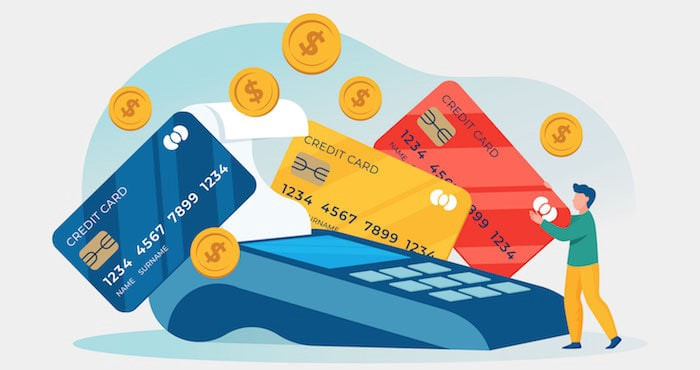

# Default Prediction for Active Credit Card Users 

**Author:** Brent Smart
***

## Overview

This project analyzes credit card payment history of customers of a Taiwanese credit card company from April 2005 - September 2005 in order to build a model that predicts whether or not an active customer will default on their line of credit. A customer's default represents lost income. The amount of a customer's sixth bill before they default represents a cost to the company. In this analysis customers' default cost this credit card company NT$ 306,733,698. The credit card company can use this predictive model to adjust outreach, resources, and approval for lines of credit.

## Business Problem

The company will be able to predict with 80% accuracy whether or not a customer will default on their line of credit. Doing so will help the company identify potential defaulters in order to evaluate the risk associated with doing business with that customer.


## Data Understanding

This project uses the "Default of Credit Card Clients Data Set" from the UCI Machine Learning Repository. The dataset provides payment history, some demographic data (sex, education, etc.), in addition to information on whether each customer will default on their line of credit for 30,000 customers. There are 23439 active card users. Hence, all features were used included in this analysis.
***

## Data Preparation


There are no missing values in this data set. The dataset originally contains data from inactive users. Customers who don't use their credit card at not at risk at defaulting and they were excluded from this analysis. Hence, they were removed from the dataset.

***

In [226]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import analysis packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold, GridSearchCV,\
cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix, plot_roc_curve,accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline


%matplotlib inline

In [2]:
# Importing and previewing data set. 
df = pd.read_excel('data/credit_default.xls',index_col=0)
df.reset_index(drop=True, inplace=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [3]:
# Renaming colomns appropriately.

col_names = df.iloc[0]
df = df[1:]
df.columns = col_names

col_details = {'PAY_0':'SEP_PAYMENT_STATUS',
               'PAY_2':'AUG_PAYMENT_STATUS',
               'PAY_3':'JUL_PAYMENT_STATUS',
               'PAY_4':'JUN_PAYMENT_STATUS',
               'PAY_5':'MAY_PAYMENT_STATUS',
               'PAY_6':'APR_PAYMENT_STATUS',
               'BILL_AMT1':'SEP_BILL',
               'BILL_AMT2':'AUG_BILL',
               'BILL_AMT3':'JUL_BILL',
               'BILL_AMT4':'JUN_BILL',
               'BILL_AMT5':'MAY_BILL',
               'BILL_AMT6':'APR_BILL',
               'PAY_AMT1':'SEP_PAYMENT',
               'PAY_AMT2':'AUG_PAYMENT',
               'PAY_AMT3':'JUL_PAYMENT',
               'PAY_AMT4':'JUN_PAYMENT',
               'PAY_AMT5':'MAY_PAYMENT',
               'PAY_AMT6':'APR_PAYMENT',
               'default payment next month':'DEFAULT_NEXT_MONTH'
              }
df.rename(columns=col_details, inplace=True)

df = df.apply(pd.to_numeric)

In [4]:
df.loc[(df['SEP_PAYMENT_STATUS'] == -2)
       & (df['AUG_PAYMENT_STATUS'] == -2)
       & (df['JUL_PAYMENT_STATUS'] == -2)
       & (df['JUN_PAYMENT_STATUS'] == -2)
       & (df['MAY_PAYMENT_STATUS'] == -2)
       & (df['APR_PAYMENT_STATUS'] == -2), 
       'CUSTOMER_ENGAGEMENT'] = 'Inactive'

df.CUSTOMER_ENGAGEMENT = df.CUSTOMER_ENGAGEMENT.fillna("Active")
df = df.loc[(df['CUSTOMER_ENGAGEMENT'] == 'Active')]

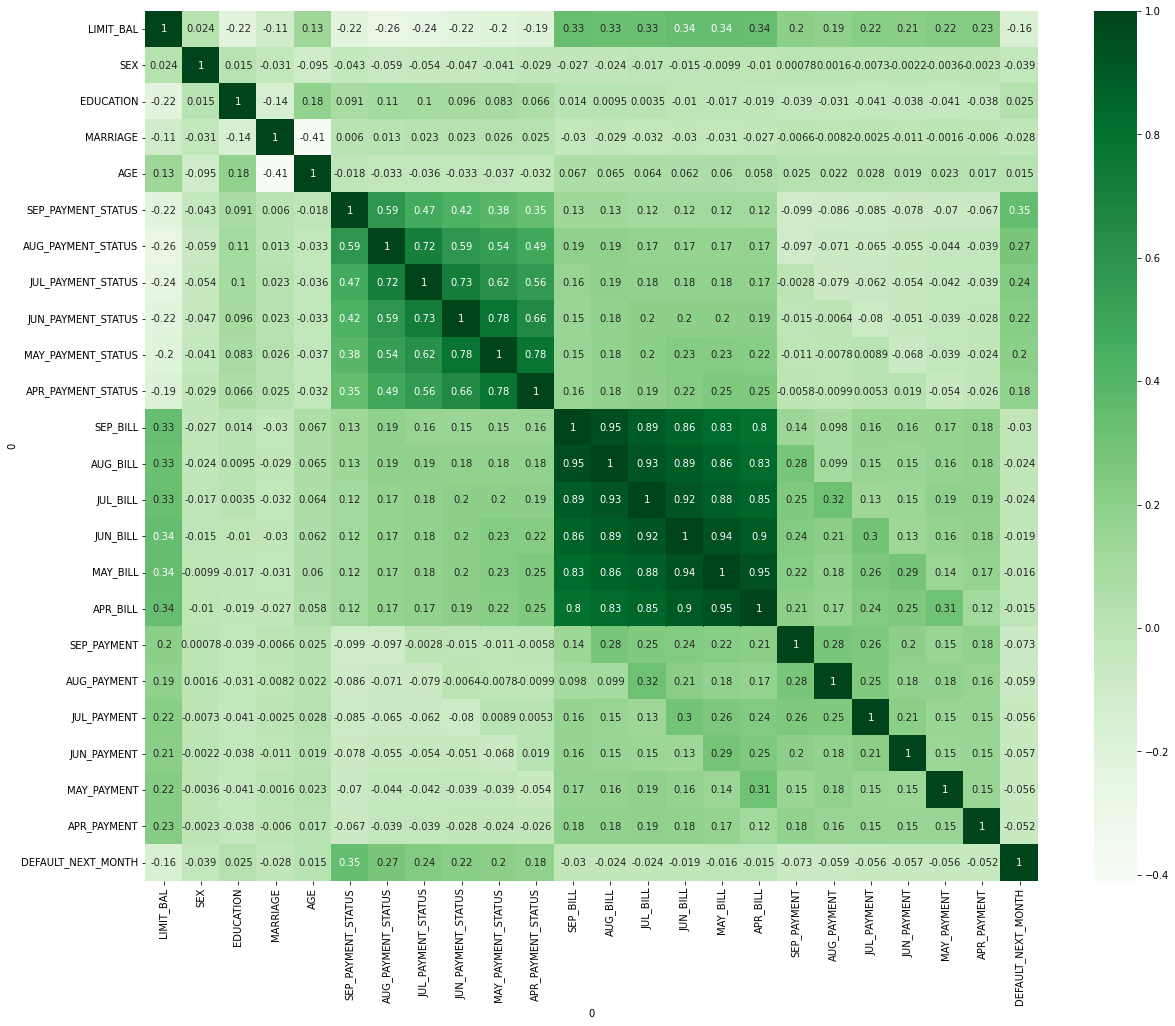

In [5]:
fig1, ax1 = plt.subplots(figsize=(20,16))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

plt.show()

In [177]:
# Dealing with multicolinarity

In [182]:
df2 = df.drop(['APR_BILL','MAY_BILL','JUN_BILL','JUL_BILL', 'AUG_BILL'], axis=1)

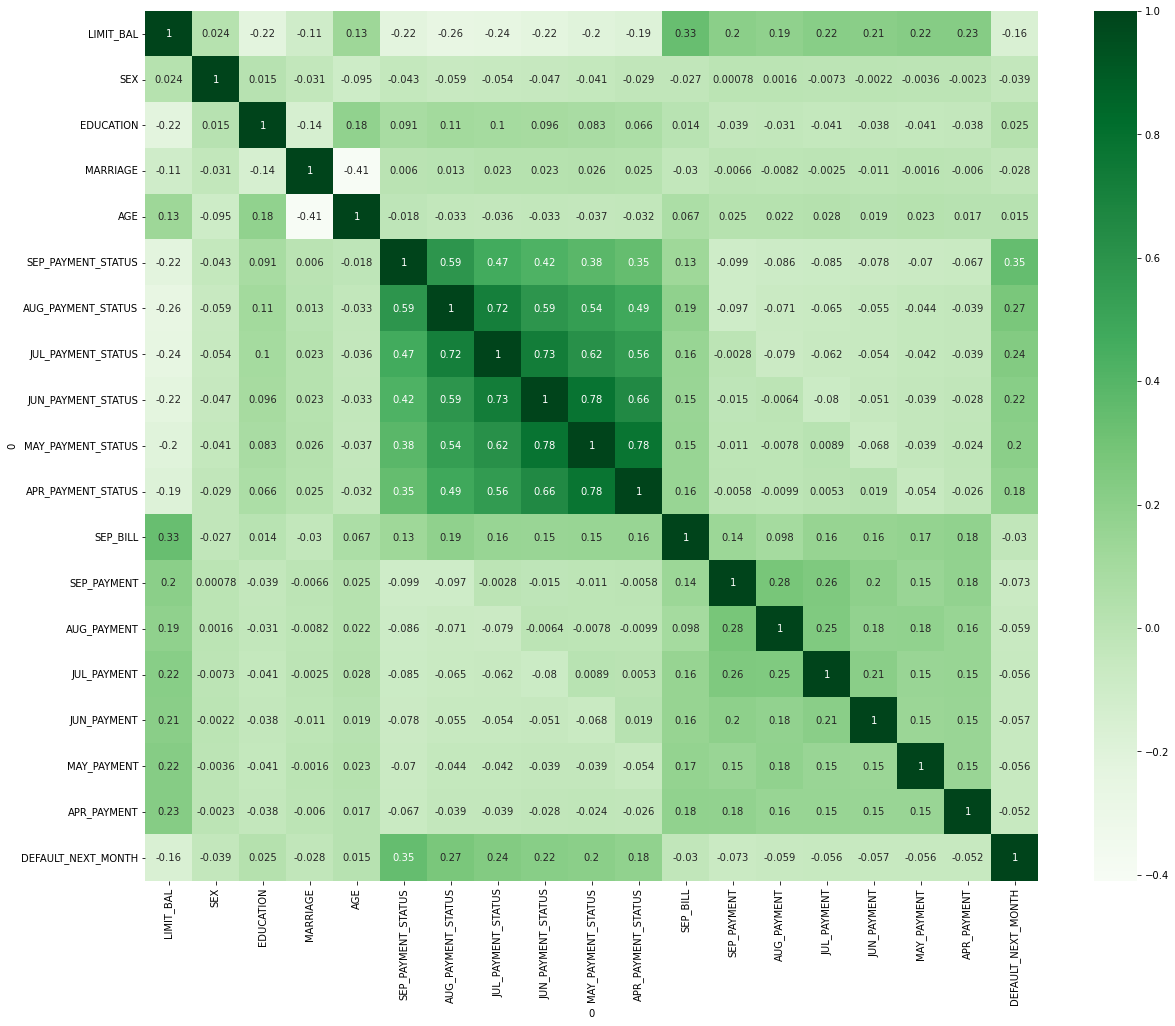

In [183]:
fig2, ax2 = plt.subplots(figsize=(20,16))
sns.heatmap(df2.corr(), annot=True, cmap='Greens')

plt.show()

In [ ]:
# sns.pairplot(df)
# plt.show()

## Data Modeling
A basic model was created and evaluated using SkLearn's Confusion Matrix Plot. An emphasis was placed on creating models that avoided/reduced False Negatives (mislabeled defaulting customers) since the goal was to reduce the cost. I total of six model were created using various libraries improving the model score from 55% to XXX.

In [6]:
# Selecting target variable (y) and dropping binned data.
y = df['DEFAULT_NEXT_MONTH'] 
X = df.drop(['DEFAULT_NEXT_MONTH',"CUSTOMER_ENGAGEMENT"],axis=1)

In [7]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [8]:
model_1 = LogisticRegression(
            C=1e3,             # Smaller value -> more regularization
            max_iter=1e3,      # Ensure we eventually reach a solution
            solver='lbfgs',    # (Default) Can optimize depending on problem
            multi_class='auto', # (Default) Will try to do multiclass classification 
            class_weight = 'balanced',
            random_state=21
)

In [9]:
model_1.fit(X1_train,y1_train)

LogisticRegression(C=1000.0, class_weight='balanced', max_iter=1000.0,
                   random_state=21)

In [10]:
# Evaluate the Model with Cross-Validation

In [11]:
cv_results_model_1 = cross_validate(
                    estimator = model_1,
                    X = X1_train,
                    y = y1_train,
                    cv = 5,
                    return_train_score = True
)

In [12]:
# overall model_1 score training data
model_1.score(X1_train, y1_train)

0.5522588741484403

In [13]:
# overall model_1 score training data
model_1.score(X1_test, y1_test)

0.5613909302742427

In [15]:
# Get predictions for traininig & testing sets
y1_hat_train = model_1.predict(X1_train)
y1_hat_test = model_1.predict(X1_test)

In [16]:
print(classification_report(y1_test,y1_hat_test))

              precision    recall  f1-score   support

           0       0.87      0.51      0.64      4308
           1       0.31      0.73      0.43      1271

    accuracy                           0.56      5579
   macro avg       0.59      0.62      0.54      5579
weighted avg       0.74      0.56      0.59      5579



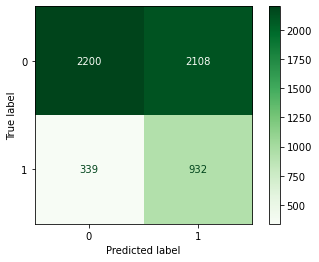

In [17]:
plot_confusion_matrix(model_1, X1_test,y1_test, cmap='Greens')
plt.show()

In [288]:
# Checking if scaling will impact model performance.

In [289]:
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [290]:
model_1_scaled.fit(X1_train,y1_train)

NameError: name 'model_1_scaled' is not defined

In [ ]:
cv_results_model_1_scaled = cross_validate(
                                            estimator = model_1_scaled,
                                            X = X1_train,
                                            y = y1_train,
                                            cv = 5,
                                            return_train_score = True
)

In [ ]:
# overall model_1 score training data
model_1_scaled.score(X1_train, y1_train)

In [ ]:
# overall model_1 score training data
model_1_scaled.score(X1_test, y1_test)

How did scaling impact model performance?

Overall the model is performs well predicting true negatives (precision is at 87%), but the model is not good at predicting true positives (precision is at 31%). There are also significantly more false positives than false negatices. However, the model performs just above the 50% threshold to be considered guessing and can be adjusted to perform better. 

In [18]:
# Saving to model Dictionary
models = {}
models['model_1'] = {'model': model_1, 'train_score':cv_results_model_1['train_score'],
                    'test_score':cv_results_model_1['test_score']}

In [26]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.20, random_state=21, stratify=y)

In [27]:
# Model improvement - making classes' weight balanced.

In [28]:
model_2 = LogisticRegression(
            C=1e3,             # Smaller value -> more regularization
            max_iter=1e3,      # Ensure we eventually reach a solution
            solver='lbfgs',    # (Default) Can optimize depending on problem
            multi_class='auto', # (Default) Will try to do multiclass classification 
            class_weight = 'balanced',
            random_state=21
)

In [29]:
model_2.fit(X2_train,y2_train)

LogisticRegression(C=1000.0, class_weight='balanced', max_iter=1000.0,
                   random_state=21)

In [30]:
cv_results_model_2 = cross_validate(
                    estimator = model_2,
                    X = X2_train,
                    y = y2_train,
                    cv = 5,
                    return_train_score = True
)

In [31]:
# overall model_2 score training data
model_2.score(X2_train, y2_train)

0.7270078881319469

In [32]:
# overall model_2 score test data
model_2.score(X2_test, y2_test)

0.7379458684352035

In [33]:
# Get predictions for traininig & testing sets
y2_hat_train = model_2.predict(X2_train)
y2_hat_test = model_2.predict(X2_test)

In [34]:
print(classification_report(y2_test,y2_hat_test))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      4308
           1       0.45      0.64      0.53      1271

    accuracy                           0.74      5579
   macro avg       0.66      0.70      0.67      5579
weighted avg       0.78      0.74      0.75      5579



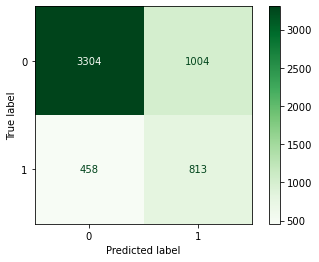

In [35]:
fig = plot_confusion_matrix(model_2, X2_test,y2_test, cmap='Greens')
plt.show()

The model's score increased by 17% with scaling and adjusting the classes' weight to balanced. The model became better at identifying True negatives, but it's performance on True Positives and False Positives decreased.

In [36]:
# Saving second model
models['model_2'] = {'model': model_2, 'train_score':cv_results_model_2['train_score'],
                    'test_score':cv_results_model_2['test_score']}

In [ ]:
# Model improvement - Decision Trees.

In [38]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.20, random_state=21, stratify=y)

In [85]:
scaler = StandardScaler()
X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.transform(X3_test)

In [86]:
model_3 = DecisionTreeClassifier()

In [87]:
model_3.fit(X3_train, y3_train)

DecisionTreeClassifier()

In [88]:
cv_results_model_3 = cross_validate(
                    estimator = model_3,
                    X = X3_train,
                    y = y3_train,
                    cv = 5,
                    return_train_score = True
)

In [89]:
# overall model_3 score training data
model_3.score(X3_train, y3_train)

0.99959662961635

In [90]:
# overall model_2 score test data
model_3.score(X3_test, y3_test)

0.7271912529127084

In [91]:
# Get predictions for traininig & testing sets
y3_hat_train = model_3.predict(X3_train)
y3_hat_test = model_3.predict(X3_test)

In [92]:
print(classification_report(y3_test,y3_hat_test))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4308
           1       0.41      0.44      0.42      1271

    accuracy                           0.73      5579
   macro avg       0.62      0.62      0.62      5579
weighted avg       0.73      0.73      0.73      5579



Unfortunately, the model was overfit to the training data. The model performed worse than the previous model on unseen data. The model will need to be tunned to improve it's overall score.

In [127]:
# define grid parameters, added one at a time
grid = {'criterion':['entropy','gini'],
        'splitter': ["best"],
        'class_weight':['balanced'],
        'max_depth': [3,4,5,6,7,8,9,10,11,12,13,14],
        'max_leaf_nodes': [5,10,15,20,25,30,35],
        'min_samples_leaf': [1,2,3],
}

In [128]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid, cv=5, scoring='accuracy')

In [129]:
gs.fit(X3_train, y3_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_leaf_nodes': [5, 10, 15, 20, 25, 30, 35],
                         'min_samples_leaf': [1, 2, 3], 'splitter': ['best']},
             scoring='accuracy')

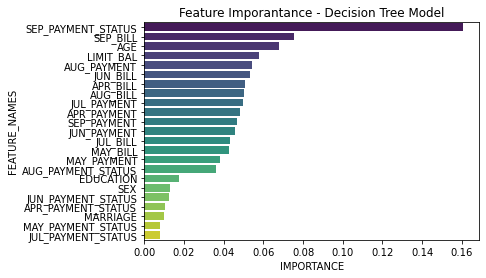

In [175]:
importance = model_3.feature_importances_
df_features = pd.DataFrame({'FEATURE_NAMES':X.columns,'IMPORTANCE':importance})

df_features_sort = df_features.sort_values(by='IMPORTANCE', ascending=False)
ax = sns.barplot(y=df_features_sort['FEATURE_NAMES'], x=df_features_sort['IMPORTANCE'],
                palette="viridis", orient="h")
ax.set_title('Feature Imporantance - Decision Tree Model')

plt.show()

In [130]:
gs.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [132]:
gs.best_score_

0.7720957104045787

In [133]:
model_3b = DecisionTreeClassifier(criterion="gini",
                                 class_weight="balanced",
                                 max_depth=4, #77
                                 max_leaf_nodes=20, 
                                 min_samples_leaf=1,
                                 splitter="best",
                                 random_state=21)

In [134]:
model_3b.fit(X3_train, y3_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=20,
                       random_state=21)

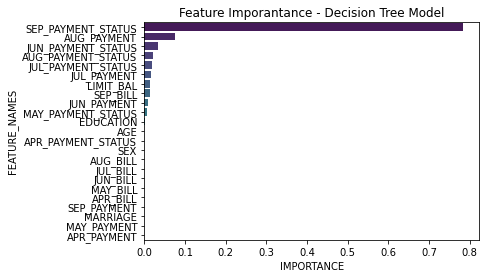

In [176]:
importance = model_3b.feature_importances_
df_features = pd.DataFrame({'FEATURE_NAMES':X.columns,'IMPORTANCE':importance})

df_features_sort = df_features.sort_values(by='IMPORTANCE', ascending=False)
ax = sns.barplot(y=df_features_sort['FEATURE_NAMES'], x=df_features_sort['IMPORTANCE'],
                palette="viridis", orient="h")
ax.set_title('Feature Imporantance - Decision Tree Model')

plt.show()

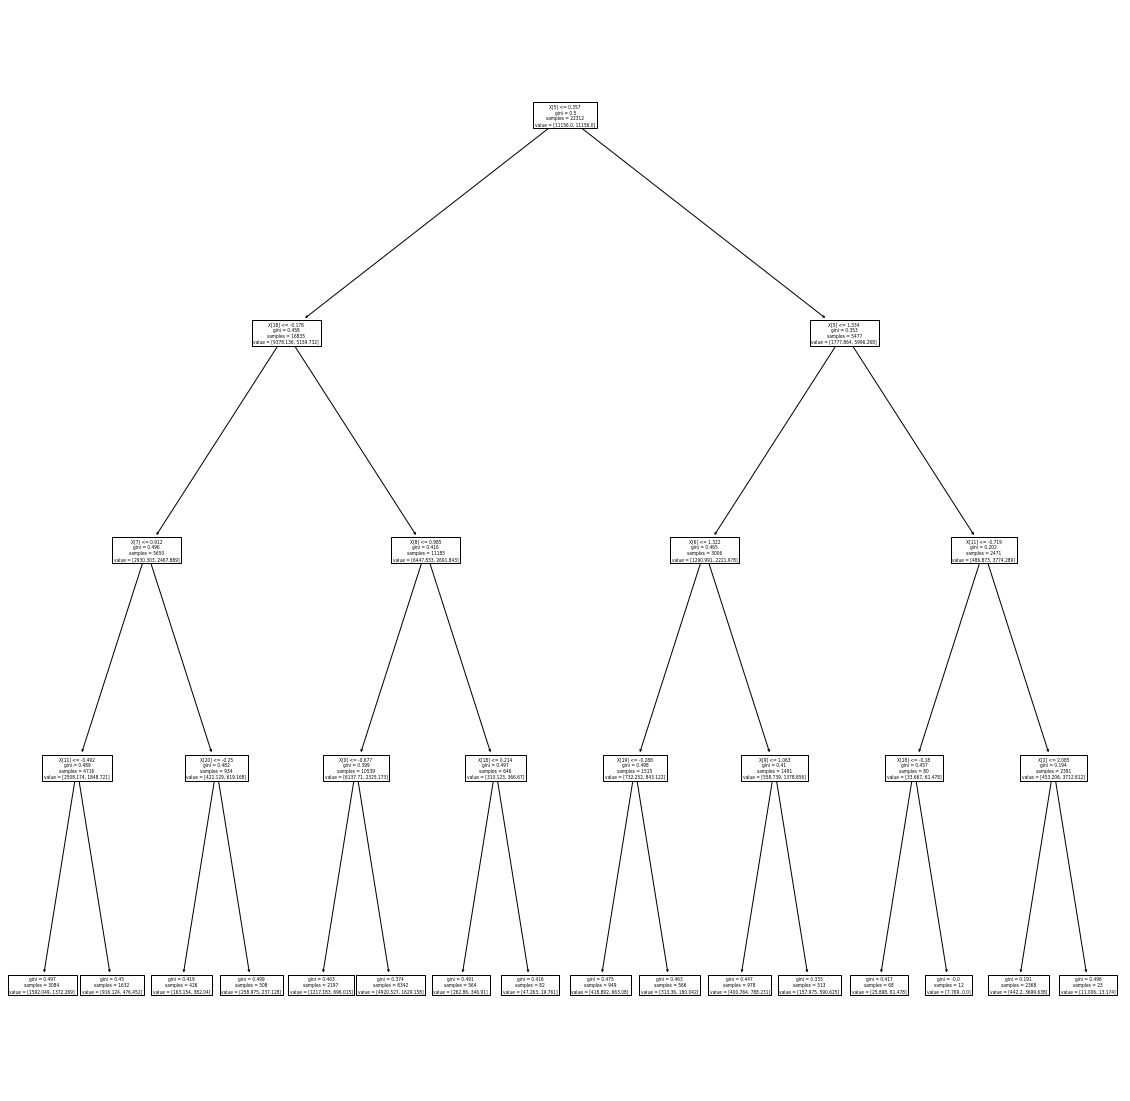

In [135]:
f, ax0 = plt.subplots(figsize=(20,20))
plot_tree(model_3b, ax=ax0)
plt.show()

In [168]:
cv_results_model_3b = cross_validate(
                    estimator = model_3b,
                    X = X3_train,
                    y = y3_train,
                    cv = 5,
                    return_train_score = True
)

# overall model_3 score training data
model_3b.score(X3_train, y3_train)

# overall model_3 score test data
model_3b.score(X3_test, y3_test)

In [171]:
# Get predictions for traininig & testing sets
y_hat_train = model_3b.predict(X3_train)
y_hat_test = model_3.predict(X3_test)

In [172]:
print(classification_report(y3_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4308
           1       0.41      0.44      0.42      1271

    accuracy                           0.73      5579
   macro avg       0.62      0.62      0.62      5579
weighted avg       0.73      0.73      0.73      5579



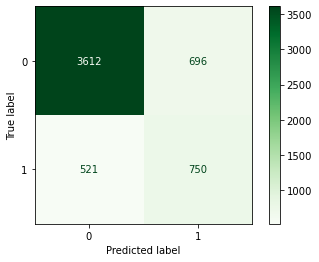

In [173]:
plot_confusion_matrix(model_3b, X3_test,y3_test, cmap='Greens')
plt.show()

In [ ]:
# Trying with modified df

In [186]:
y2 = df2['DEFAULT_NEXT_MONTH'] 
X2 = df2.drop(['DEFAULT_NEXT_MONTH',"CUSTOMER_ENGAGEMENT"],axis=1)

In [188]:
X3c_train, X3c_test, y3c_train, y3c_test = train_test_split(X2, y2, test_size=0.20, random_state=21, stratify=y)

In [195]:
model_3c = DecisionTreeClassifier(criterion="gini",
                                 class_weight="balanced",
                                 max_depth=4, #77
                                 max_leaf_nodes=20, 
                                 min_samples_leaf=1,
                                 splitter="best",
                                 random_state=21)

In [196]:
model_3c.fit(X3c_train, y3c_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=20,
                       random_state=21)

In [200]:
model_3c.score(X3c_test, y3c_test)

0.7818605484853917

In [197]:
# Get predictions for traininig & testing sets
y3_hat_train = model_3c.predict(X3c_train)
y3_hat_test = model_3c.predict(X3c_test)

In [198]:
print(classification_report(y3_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4308
           1       0.41      0.44      0.42      1271

    accuracy                           0.73      5579
   macro avg       0.62      0.62      0.62      5579
weighted avg       0.73      0.73      0.73      5579



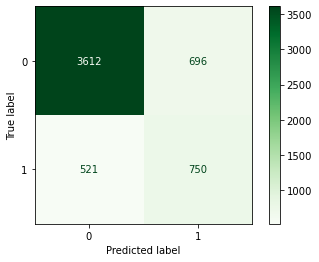

In [199]:
plot_confusion_matrix(model_3c, X3c_test,y3c_test, cmap='Greens')
plt.show()

Unfortunately, dropping correlated features doesnot improve model performance.

Model_3b placed September payment status as the single most important feature in making decisions at 80%. 

Model_3/model_3b also performed better than model_2 in accuracy by about 5%. Model_3/3b also performed better on the training data than on the test data, hinting to the model being overfitted. There are less False Positives, but more False Negatives. Predicting 0 when the true value is 1 means that the model misses these customers that will default. Another model will be needed.

In [184]:
models['model_3b'] = {'model': model_3b, 'train_score':cv_results_model_3b['train_score'],
                    'test_score':cv_results_model_3b['test_score']}

In [ ]:
# Model improvement - Random Forest.

In [201]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size=0.20, random_state=21, stratify=y)

In [217]:
model_4 = RandomForestClassifier(random_state=21)
model_4.fit(X4_train, y4_train)

RandomForestClassifier(random_state=21)

In [ ]:
importance = model_4.feature_importances_
df_features = pd.DataFrame({'FEATURE_NAMES':X.columns,'IMPORTANCE':importance})

df_features_sort = df_features.sort_values(by='IMPORTANCE', ascending=False)
ax = sns.barplot(y=df_features_sort['FEATURE_NAMES'], x=df_features_sort['IMPORTANCE'],
                palette="viridis", orient="h")
ax.set_title('Feature Imporantance - Decision Tree Model')

plt.show()

In [218]:
cv_results_model_4 = cross_validate(
                    estimator = model_4,
                    X = X4_train,
                    y = y4_train,
                    cv = 5,
                    return_train_score = True
)

In [219]:
# overall model_4 score training data
model_4.score(X4_test, y4_test)

0.8160960745653343

In [220]:
cv_results_model_4['train_score'].mean()

0.9995966311226153

In [221]:
cv_results_model_4['test_score'].mean()

0.8092955847034731

In [222]:
# Get predictions for traininig & testing sets
y_hat_train = model_4.predict(X4_train)
y_hat_test = model_4.predict(X4_test)

In [223]:
print(classification_report(y4_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4308
           1       0.66      0.40      0.50      1271

    accuracy                           0.82      5579
   macro avg       0.75      0.67      0.69      5579
weighted avg       0.80      0.82      0.80      5579



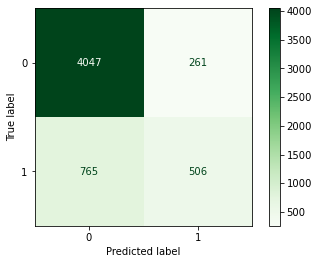

In [224]:
plot_confusion_matrix(model_4, X4_test,y4_test, cmap='Greens')
plt.show()

There are less false positives, but more false negatives in model_4, compared to the model_3 iterations. An investigation into tunning the model is needed.

In [284]:
# define grid parameters, added one at a time
grid = {#'bootstrap': [False, True],
        'n_estimators':[70,80,90,100,110,120,130,140],
        'criterion': ['gini', 'entropy'],
        'max_depth': [5, 7, 8, 9, 10, 11, None],
        'class_weight':['balanced'],
        'min_samples_split': [2,3,4,5]
}

In [285]:
gsf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv=5, scoring='accuracy')

In [286]:
gsf.fit(X4_train, y4_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 8, 9, 10, 11, None],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [70, 80, 90, 100, 110, 120, 130, 140]},
             scoring='accuracy')

In [287]:
gsf.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_split': 3,
 'n_estimators': 120}

In [291]:
gsf.best_score_

0.8118053484836174

In [293]:
model_4b = RandomForestClassifier(class_weight='balanced',
                                  criterion='entropy',
                                  max_depth=None,
                                  min_samples_split=3,
                                  n_estimators=120)

In [295]:
model_4b.fit(X4_train,y4_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_split=3, n_estimators=120)

In [296]:
cv_results_model_4b = cross_validate(
                    estimator = model_4,
                    X = X4_train,
                    y = y4_train,
                    cv = 5,
                    return_train_score = True
)

# overall model_3 score training data
model_4b.score(X4_train, y4_train)

# overall model_3 score test data
model_4b.score(X4_test, y4_test)

0.8171715361175838

In [297]:
# Get predictions for traininig & testing sets
y_hat_train = model_4b.predict(X4_train)
y_hat_test = model_4b.predict(X4_test)

In [298]:
print(classification_report(y4_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4308
           1       0.67      0.39      0.50      1271

    accuracy                           0.82      5579
   macro avg       0.75      0.67      0.69      5579
weighted avg       0.80      0.82      0.80      5579



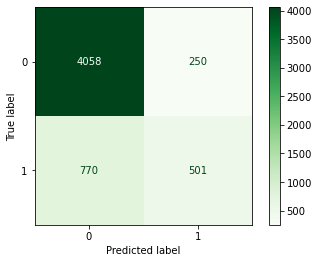

In [299]:
plot_confusion_matrix(model_4b, X4_test,y4_test, cmap='Greens')
plt.show()

Model_4b performs at 82% accuracy. However, there are more False Positive than model_4. It is unideal to predict that someone will not default, when they actually do. Hence, model_4 will be a better predictor.

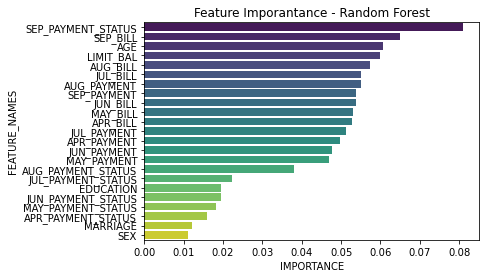

In [301]:
importance = model_4b.feature_importances_
df_features = pd.DataFrame({'FEATURE_NAMES':X.columns,'IMPORTANCE':importance})

df_features_sort = df_features.sort_values(by='IMPORTANCE', ascending=False)
ax = sns.barplot(y=df_features_sort['FEATURE_NAMES'], x=df_features_sort['IMPORTANCE'],
                palette="viridis", orient="h")
ax.set_title('Feature Imporantance - Random Forest')

plt.show()

The model takes into account other variables. However, misses clients who may default.

## Evaluation
The final model fits well to the data. In comparison with the baseline model, the model score has increased 23%. I am confident that this model would benefitial to the credit card company to help identify credit card defaulters. 